<a href="https://colab.research.google.com/github/rajkumarshahu/AI-Colab/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Exploration and Cleaning

#### Load the data

In [8]:
data = pd.read_csv("/content/heart_2022_with_nans.csv", delimiter=None, engine='python')
print(data.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0          NaN             

#### Summary statistics

In [9]:
summary_statistics = data.describe(include='all')
summary_statistics

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,445132,445132,443934,434205.000000,436065.000000,436824,444039,439679.000000,433772,442067,...,416480.000000,403054.000000,396326.000000,398558,379005,398011,368092,362616,394509,394368
unique,54,2,5,NaN,NaN,4,2,NaN,4,2,...,NaN,NaN,NaN,2,2,2,2,4,2,3
top,Washington,Female,Very good,NaN,NaN,Within past year (anytime less than 12 months ...,Yes,NaN,None of them,No,...,NaN,NaN,NaN,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,26152,235893,148444,NaN,NaN,350944,337559,NaN,233455,416959,...,NaN,NaN,NaN,210891,249919,209256,215604,121493,377324,270055
mean,NaN,NaN,NaN,4.347919,4.382649,NaN,NaN,7.022983,NaN,NaN,...,1.702691,83.074470,28.529842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,8.688912,8.387475,NaN,NaN,1.502425,NaN,NaN,...,0.107177,21.448173,6.554889,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,...,0.910000,22.680000,12.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,6.000000,NaN,NaN,...,1.630000,68.040000,24.130000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,7.000000,NaN,NaN,...,1.700000,80.740000,27.440000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000,5.000000,NaN,NaN,8.000000,NaN,NaN,...,1.780000,95.250000,31.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Check and handle missing values

In [10]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

missing_values_after_handling = data.isnull().sum()
missing_values_after_handling

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

# Visualizing Data Distribution


#### 1. Outcome Variable

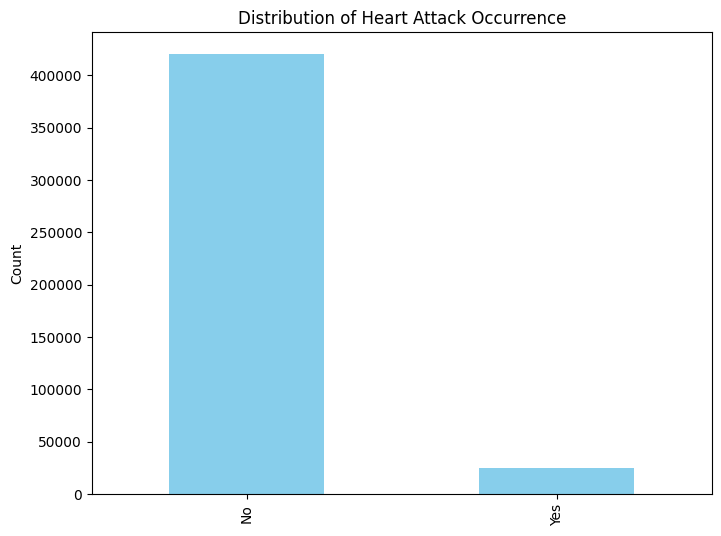

In [11]:
plt.figure(figsize=(8, 6))
data['HadHeartAttack'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Heart Attack Occurrence')
plt.ylabel('Count')
plt.show()

#### 2. Health Metrics

In [ ]:
plt.figure(figsize=(20, 6))

# 1. PhysicalHealthDays
plt.subplot(1, 3, 1)
sns.countplot(data=data, x='PhysicalHealthDays', color='green')
plt.title('Distribution of PhysicalHealthDays')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis tick labels

# 2. MentalHealthDays
plt.subplot(1, 3, 2)
sns.countplot(data=data, x='MentalHealthDays', color='purple')
plt.title('Distribution of MentalHealthDays')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis tick labels

# 3. BMI
plt.subplot(1, 3, 3)
sns.histplot(data['BMI'], kde=True, color='coral', bins=30)
plt.title('Distribution of BMI')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### 3. Lifestyle Habits

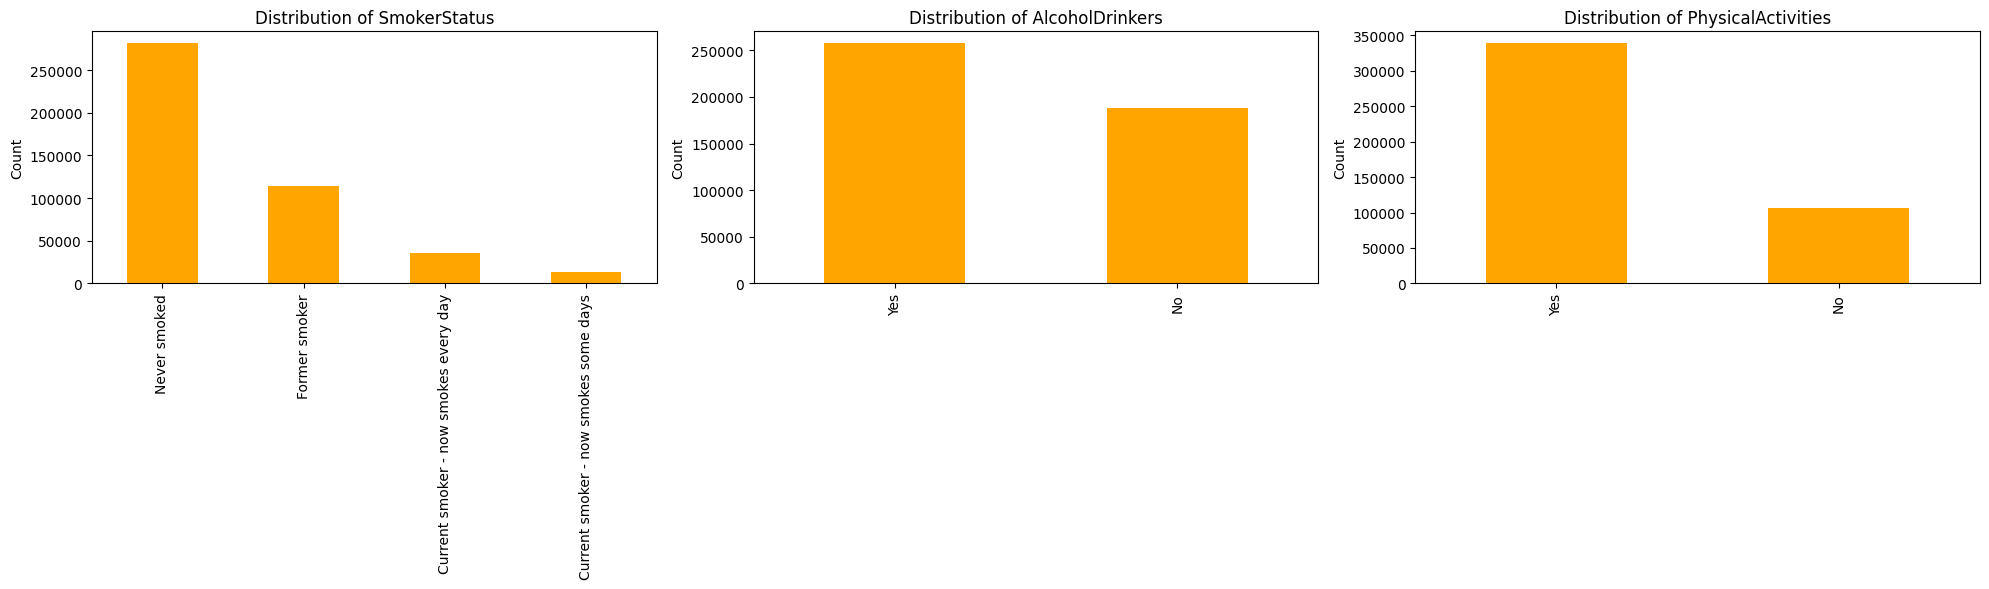

In [19]:
plt.figure(figsize=(20, 6))
lifestyle_habits = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities']
for i, col in enumerate(lifestyle_habits, 1):
    plt.subplot(1, 3, i)
    data[col].value_counts().plot(kind='bar', color='orange')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

#### 4. Other Health Conditions

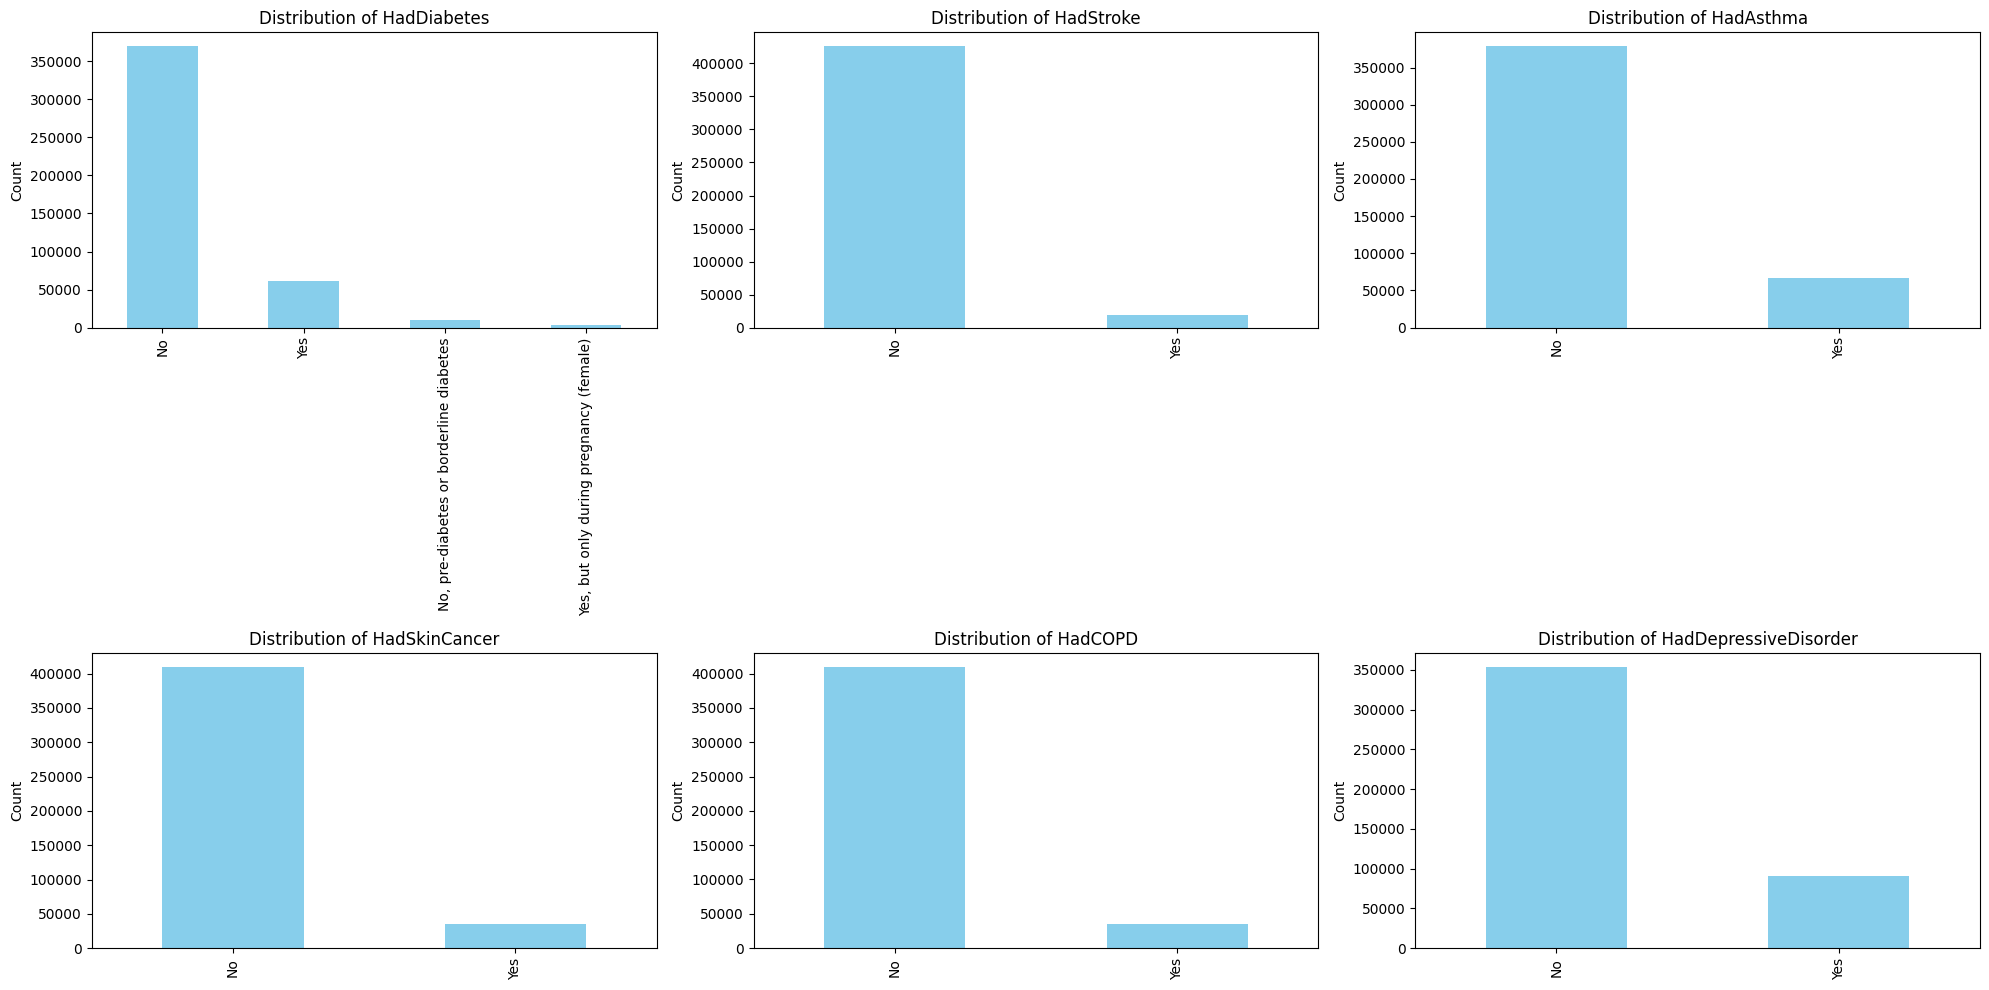

In [21]:
plt.figure(figsize=(20, 10))
health_conditions = ['HadDiabetes', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder']
for i, col in enumerate(health_conditions, 1):
    plt.subplot(2, 3, i)
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

#### 5. General Health Perception

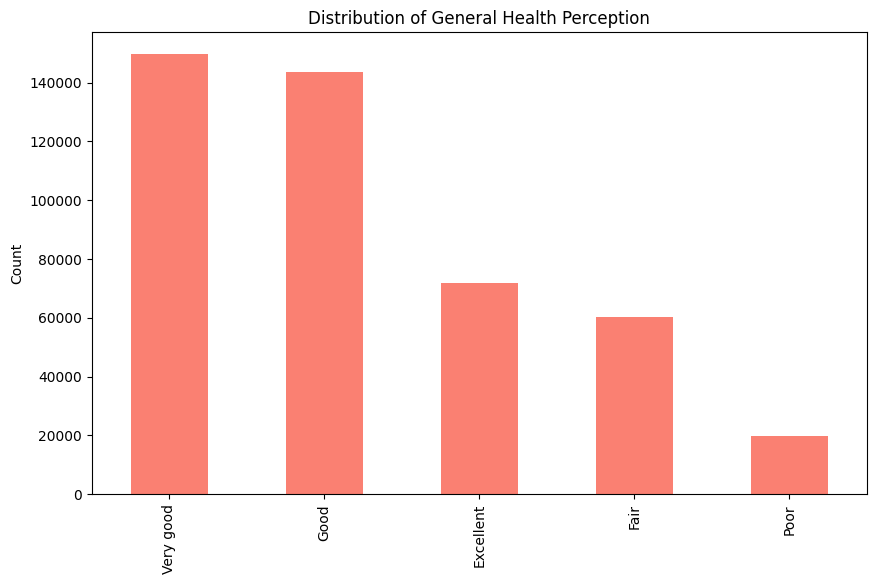

In [23]:
plt.figure(figsize=(10, 6))
data['GeneralHealth'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of General Health Perception')
plt.ylabel('Count')
plt.show()